In [71]:
import numpy as np 
from scipy import integrate
import matplotlib.pyplot as plt

In [72]:
#Condicions Iniciales
N0=np.array([500,0,0])
t=np.linspace(0,10,50)
h=t[1]-t[0]
#Sistema de ED
def Sistema(ci,t):
    A,B,C=ci
    dNa=-(0.5/h)*A
    dNb=(0.5/h)*A-(0.3/h)*B
    dNc=(0.3/h)*B
    
    return np.array([dNa,dNb,dNc])
#Integral
I=integrate.odeint(Sistema,N0,t)

In [73]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1],r[2]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [74]:
def CheckStep(Delta1,Delta2,Delta3,h,minimo=1e-2,maximo=1e-1):
    
    tolerancia = 0.001
    
    Delta1 = np.abs(Delta1)
    Delta2 = np.abs(Delta2)
    Delta3 = np.abs(Delta3)
    
    if Delta1 < tolerancia:
        h = minimo
        dx = Delta1
        
    else:
        
        if np.abs((Delta1 - Delta2))/Delta1 > maximo:
            h = 0.5*h
            dx = Delta2
        
        elif np.abs((Delta1-Delta3))/Delta1 < minimo:
            h = 2*h
            dx = Delta3
        
        else:
            dx = Delta1
            
    return dx,h

In [75]:
def Adaptativo(f,r0,t,e=10**(-4)):
    #Calcule $h$, $t_{0}$, $t_{f}$.
    h=t[1]-t[0]
    
    tf=t[-1]
    t=t[0]
    
    r = r0
    
    Time = np.array([t])
    vec=r0
    #Defina los vectores de tiempo y de solucion del sistema.
    while t < tf:
    # Avance h desde el punto actual
        r1 = Increment(f,r,t,h)
    # Avance h desde el siguiente punto
        r2 = Increment(f,r1,t+h,h)
    # Avance 2h desde el punto actual
        rt = Increment(f,r,t,2*h)
    # El error es comparar los avances
    #->h->h y ->2h en sus componentes
        error = np.linalg.norm( r2 - rt )
    # Si el error es menor que la tolerancia (e) -> avanzo 2h
        if error < e:
            t += 2*h
            r = rt
            # Llene vectores
        rs = r1.copy()
        ht = rs.copy()
        
        for i in range(r1.shape[0]):
            rs[i],ht[i] = CheckStep(r1[i],r2[i],rt[i],h)
    
        # Si el error es muy grande, cambie el paso
        # Seg´un Fehlberg
        q = 0.85*(e/error)**0.25
        h = h*q
        
        h = np.mean(ht)
        t += h
        
        r = Increment(f,r,t,h)
        
        Time = np.append(Time,t)
        vec = np.vstack((vec,r))
    return Time, vec

In [76]:
t1,x1 = Adaptativo(Sistema,N0,t)

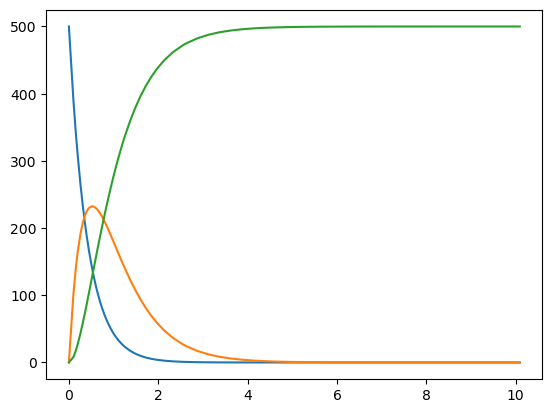

In [94]:
plt.plot(t1,x1)
plt.show()

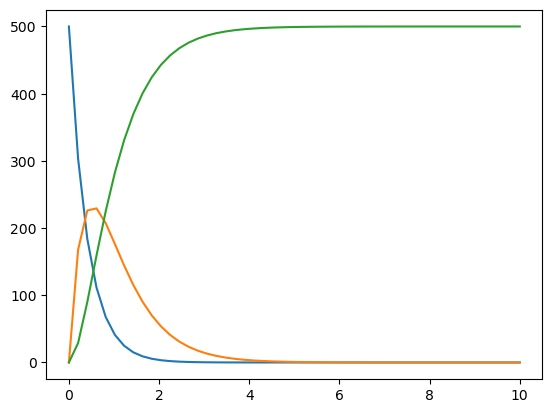

In [78]:
plt.plot(t,I)
plt.show()

In [98]:
xB = np.zeros(len(x1))
for i in range(len(x1)):
    xB[i] = x1[i][1]
    
maximo = max(xB)
maximo

232.35129505389423

In [100]:
indices = np.where(xB == maximo)
indices

(array([10], dtype=int64),)